<a href="https://colab.research.google.com/github/m17moud/Supervised-Learning/blob/main/Diabetes_(_Classification_Models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=8)

In [8]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

In [9]:
results = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for {model_name}:\n", classification_report(y_test, y_pred))
    results[model_name] = accuracy

Training Logistic Regression...
Logistic Regression Accuracy: 0.7987
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       102
           1       0.73      0.63      0.68        52

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.80      0.79       154

Training Decision Tree...
Decision Tree Accuracy: 0.6688
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       102
           1       0.51      0.52      0.51        52

    accuracy                           0.67       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.67      0.67      0.67       154

Training Random Forest...
Random Forest Accuracy: 0.7532
Classification Report for Random Forest:
               precision    reca

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7338
Classification Report for AdaBoost:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       102
           1       0.61      0.60      0.60        52

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



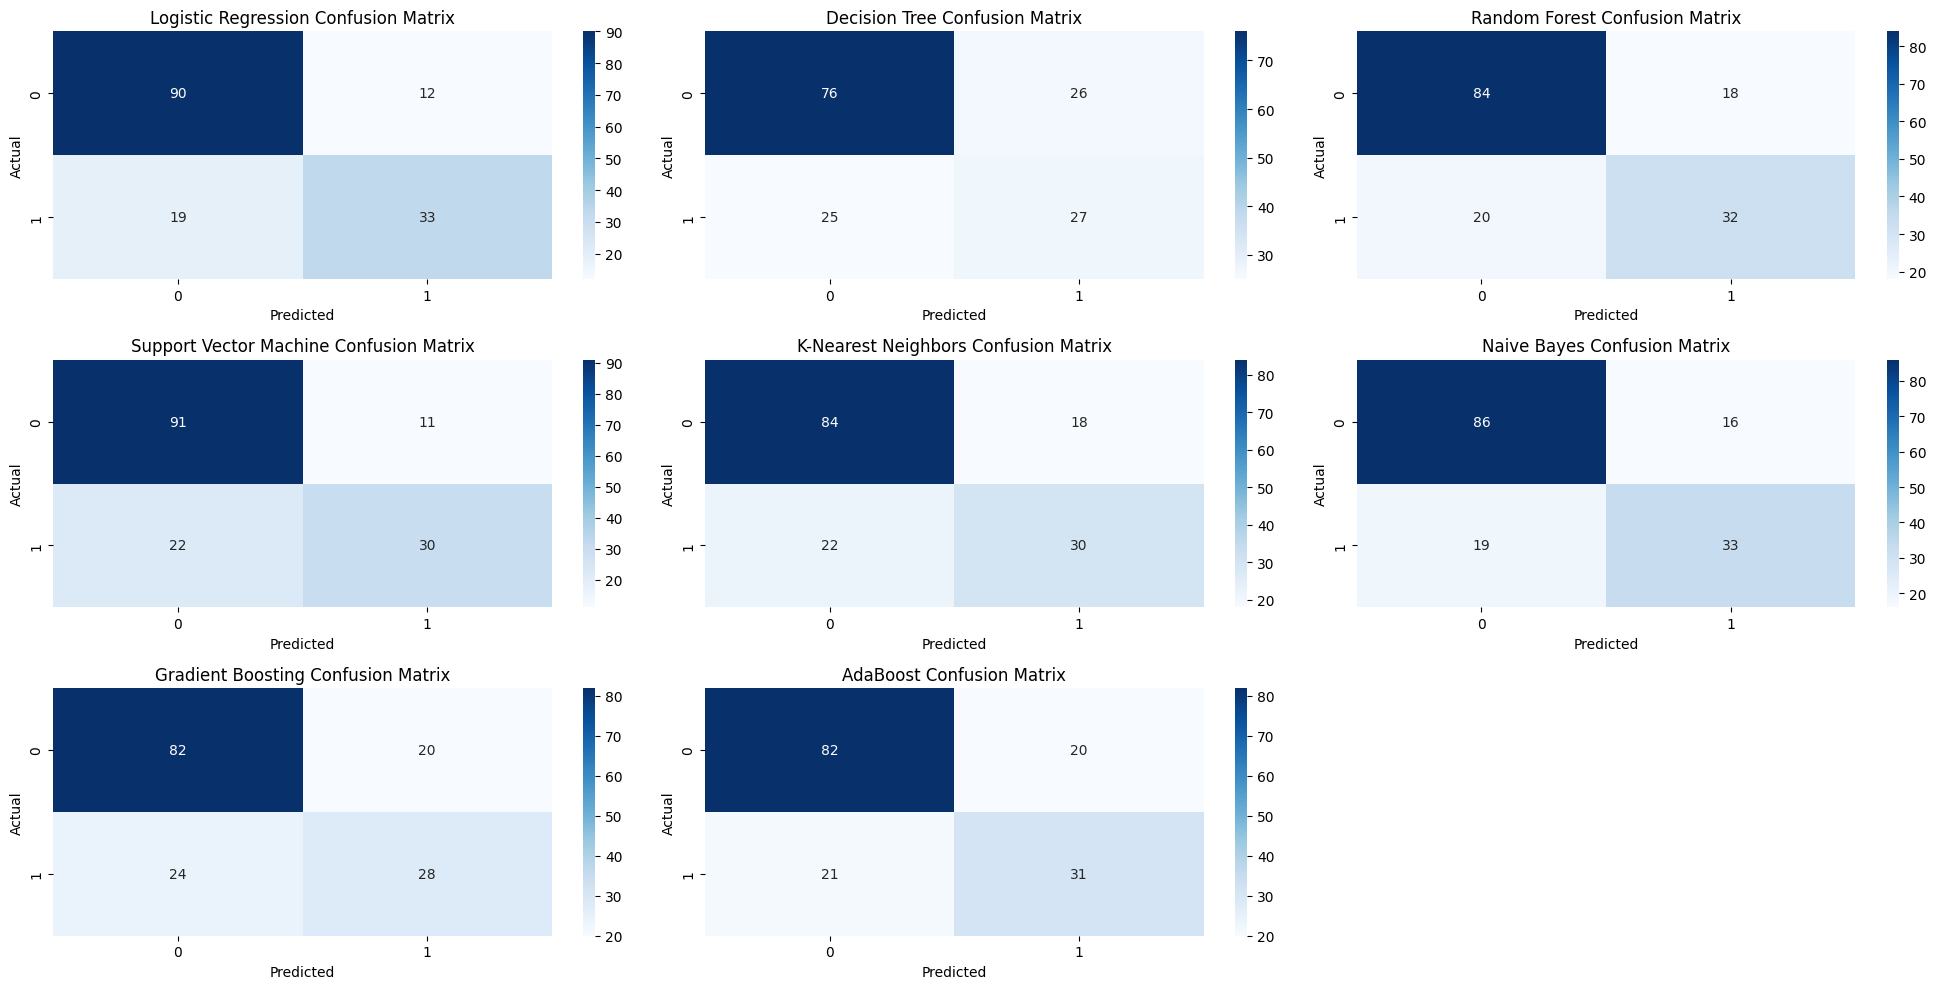

In [10]:
plt.figure(figsize=(20, 10))
for i, (model_name, model) in enumerate(models.items(), 1):
    plt.subplot(3, 3, i)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

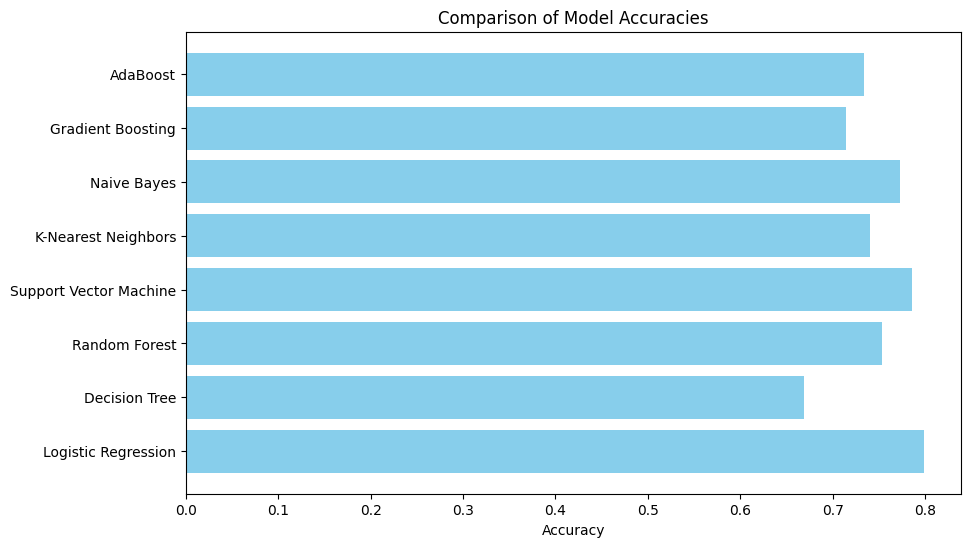

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(list(results.keys()), list(results.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

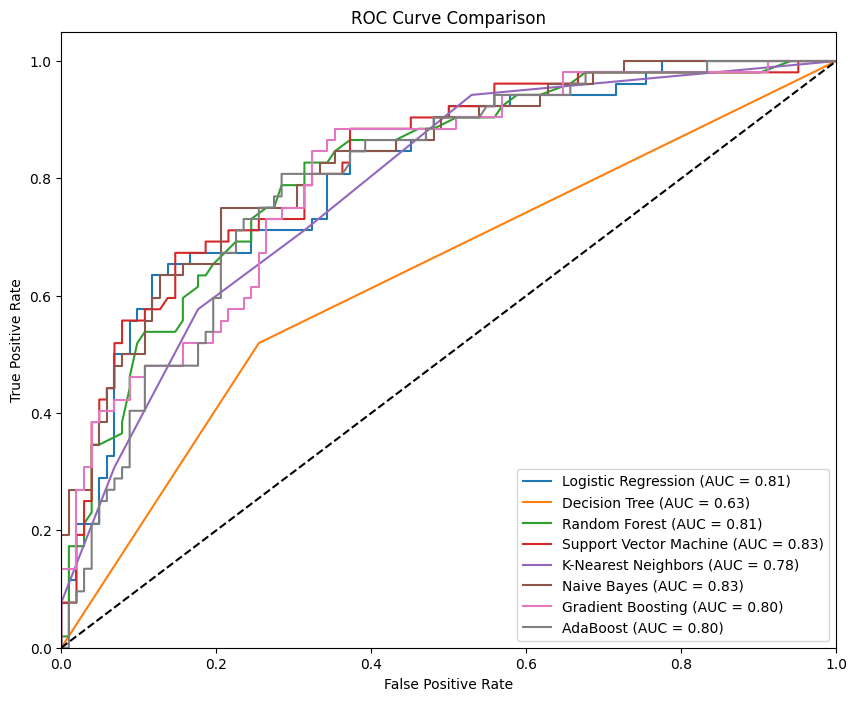

In [12]:
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [13]:
def get_user_input():
    print("Enter the following details:")
    pregnancies = int(input("Pregnancies: "))
    glucose = int(input("Glucose level: "))
    blood_pressure = int(input("Blood Pressure: "))
    skin_thickness = int(input("Skin Thickness: "))
    insulin = int(input("Insulin: "))
    bmi = float(input("BMI: "))
    diabetes_pedigree = float(input("Diabetes Pedigree Function: "))
    age = int(input("Age: "))

    # Store the input data into a DataFrame
    user_data = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree],
        'Age': [age]
    })

    return user_data

def predict_outcome(user_data):
    # Scale the user input data
    user_data_scaled = scaler.transform(user_data)

    # Predict the outcome using the trained model
    prediction = model.predict(user_data_scaled)

    # Return the prediction
    return "Diabetic" if prediction[0] == 1 else "Not Diabetic"

# Step 9: Get input from user and predict the outcome
user_data = get_user_input()
outcome = predict_outcome(user_data)
print(f"The model predicts that the user is: {outcome}")

Enter the following details:
Pregnancies: 13
Glucose level: 145
Blood Pressure: 86
Skin Thickness: 19
Insulin: 120
BMI: 24.5
Diabetes Pedigree Function: .245
Age: 57
The model predicts that the user is: Not Diabetic
